# **BELLABEAT CASE STUDY**
*How can a wellness technology company play it smart?*

# **ABOUT THE COMPANY**

Bellabeat, founded in 2013, is a tech company specializing in smart health products designed for women. The company aims to empower women by providing insights into their health and daily habits, and it has quickly established itself as a leader in female-focused wellness technology. Urška Sršen, the Chief Creative Officer, believes that by analyzing fitness data from their smart devices, Bellabeat can discover new avenues for growth and innovation.

# **Business Task**

Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends for marketing strategy.

# **STAKEHOLDERS**


*   Urška Sršen - Bellabeat's cofounder and Chief Creative Officer.
*   Sando Mur - Mathematician and Bellabeat's cofounder; key member of the Bellabeat executive team.
*   Bellabeat marketing analytics team - A team of data analytics team - A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat's marketing strategy.



# **(1) ASK**


*   What are some trends in smart devices?
*   How could you apply these trends to Bellabeat customers?
*   How could these trends help influence Bellabeat marketing strategy?



# **(2) PREPARE**

**ABOUT THE DATA**

*   This public dataset is availabe on Kaggle and comprises of 18 CSV files- each containing specific tracking information, such as daily calories, daily steps, etc.
*   The dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk and comprehends dates between 03-12-2016 and 05-12-2016.
*   Thirty FitBit users consented to the submission of their personal tracker data - which includes a minute-level output for physical activity, heart rate, and sleep monitoring.
*   With regards to data bias, it is important to note that data is not perfect representation of the FitBit users. It does not tell us whether the users are male or female, young or old etc. The data is also not reliable as only 30 users were considered which is a very small group of people and we also do not know where the users belong to.



# **PROCESS**

We will use python to prepare and process the data. We will start by importing the required liberaries.

In [1]:
#importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
#reading the selected files with read_csv function
daily_activity = pd.read_csv('dailyActivity_merged.csv')
hourly_calories = pd.read_csv('hourlyCalories_merged.csv')
hourly_steps = pd.read_csv('hourlySteps_merged.csv')
sleep = pd.read_csv('sleepDay_merged.csv')

# **Data Exploration**
Previewing the imported datasets using head() function

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [5]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [6]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [7]:
#Overview of the first 15 records
daily_activity.head(15)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


# Looking for NULL or missing values in the dataframes

In [8]:
daily_activity.isnull().any()

,0
Id,False
ActivityDate,False
TotalSteps,False
TotalDistance,False
TrackerDistance,False
LoggedActivitiesDistance,False
VeryActiveDistance,False
ModeratelyActiveDistance,False
LightActiveDistance,False
SedentaryActiveDistance,False


In [9]:
hourly_calories.isnull().any()

,0
Id,False
ActivityHour,False
Calories,False


In [10]:
hourly_steps.isnull().any()

,0
Id,False
ActivityHour,False
StepTotal,False


In [11]:
sleep.isnull().any()

,0
Id,False
SleepDay,False
TotalSleepRecords,False
TotalMinutesAsleep,False
TotalTimeInBed,False


There are no NULL values found in the dataframes

# Finding duplicate records in each dataset

In [12]:
daily_activity.drop_duplicates()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [13]:
hourly_calories.drop_duplicates()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126
22095,8877689391,5/12/2016 11:00:00 AM,192
22096,8877689391,5/12/2016 12:00:00 PM,321
22097,8877689391,5/12/2016 1:00:00 PM,101


In [14]:
hourly_steps.drop_duplicates()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,514
22095,8877689391,5/12/2016 11:00:00 AM,1407
22096,8877689391,5/12/2016 12:00:00 PM,3135
22097,8877689391,5/12/2016 1:00:00 PM,307


In [15]:
sleep.drop_duplicates()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


# Finding the number of unique IDs in each dataset

---



In [17]:
#Now we will find the number of unique ids in each dataset
id_unique = len(pd.unique(daily_activity['Id']))
print("Number of unique IDs in daily_activity: ", id_unique)
id_hour_cal = len(pd.unique(hourly_calories['Id']))
print("Number of unique IDs in hourly_calories: ", id_hour_cal)
id_hour_step = len(pd.unique(hourly_steps['Id']))
id_sleep = len(pd.unique(sleep['Id']))
print("Number of unique IDs in sleep: ", id_sleep)

Number of unique IDs in daily_activity:  33
Number of unique IDs in hourly_calories:  33
Number of unique IDs in sleep:  24


We can see that the unique number of ids in each dataset do not match with the number of users providing the data which can cause innacuracy in our findings.

Looking into the datatypes of each dataset

In [18]:
daily_activity.dtypes

,0
Id,int64
ActivityDate,object
TotalSteps,int64
TotalDistance,float64
TrackerDistance,float64
LoggedActivitiesDistance,float64
VeryActiveDistance,float64
ModeratelyActiveDistance,float64
LightActiveDistance,float64
SedentaryActiveDistance,float64


Renaming the "Activity Date" column to "Date" and also changing the datatype to date

In [22]:
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})

In [24]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])

In [25]:
daily_activity['Date'].dtype

dtype('<M8[ns]')

In [27]:
hourly_calories.dtypes

,0
Id,int64
ActivityHour,object
Calories,int64


In [28]:
hourly_calories = hourly_calories.rename(columns={'ActivityHour': 'Time'})

In [29]:
hourly_calories['Time'] = pd.to_datetime(hourly_calories['Time'])

<ipython-input-29-b4b63136d666>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_calories['Time'] = pd.to_datetime(hourly_calories['Time'])


In [30]:
hourly_calories['Time'].dtype

dtype('<M8[ns]')

In [31]:
hourly_steps.dtypes

,0
Id,int64
ActivityHour,object
StepTotal,int64


In [32]:
hourly_steps = hourly_steps.rename(columns={'ActivityHour': 'Time'})

In [33]:
hourly_steps['Time'] = pd.to_datetime(hourly_steps['Time'])

<ipython-input-33-d55e2103d5f6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_steps['Time'] = pd.to_datetime(hourly_steps['Time'])


In [36]:
hourly_steps.Time.dtype

dtype('<M8[ns]')

In [37]:
sleep.dtypes

,0
Id,int64
SleepDay,object
TotalSleepRecords,int64
TotalMinutesAsleep,int64
TotalTimeInBed,int64


In [38]:
sleep = sleep.rename(columns={'SleepDay': 'Date'})

In [39]:
sleep['Date'] = pd.to_datetime(sleep['Date'])

<ipython-input-39-f2f1c2959c99>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep['Date'] = pd.to_datetime(sleep['Date'])


In [40]:
sleep['Date'].dtype

dtype('<M8[ns]')

## Data Merging

As we have renamed the specific columns and converted them into the datetime format. Now we will merge the dataset for our analysis

In [42]:
#Combining the daily activity and sleep as a single dataframe
merged_daily = pd.merge(daily_activity, sleep, on = 'Date')

In [43]:
merged_daily.head(15)

,Id_x,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Id_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4020332650,1,501,541
5,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4445114986,2,429,457
6,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4702921684,1,425,439
7,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,5553957443,1,441,464
8,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,5577150313,1,419,438
9,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,6962181067,1,366,387


In [44]:
#renaming the id columns for better readability
merged_daily = merged_daily.rename(columns={'Id_x': 'Id_daily'})
merged_daily = merged_daily.rename(columns={'Id_y': 'Id_sleep'})
merged_daily.head()

,Id_daily,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Id_sleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4020332650,1,501,541


In [51]:
#Similarly merging the hourly_steps and hourly_calories datasets.
merged_hours = pd.merge(hourly_steps, hourly_calories, on = ['Time', 'Id'])

In [52]:
merged_hours.head()

,Id,Time,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


## Analyzing the merged datasets

Overviewing the general statistics of the datasets

In [53]:
merged_daily.describe()

,Id_daily,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Id_sleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,1.262500e+04,12625,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,1.262500e+04,12625.000000,12625.000000,12625.000000
mean,4.860788e+09,2016-04-25 21:44:23.001980160,7677.291564,5.516843,5.502480,0.105511,1.507958,0.570082,3.360555,0.001589,21.265822,13.660436,194.197545,992.791446,2315.398495,4.999624e+09,1.121663,419.308990,458.611327
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.503960e+09,1.000000,58.000000,61.000000
25%,2.320127e+09,2016-04-19 00:00:00,3821.000000,2.630000,2.630000,0.000000,0.000000,0.000000,1.960000,0.000000,0.000000,0.000000,129.000000,730.000000,1838.000000,3.977334e+09,1.000000,361.000000,403.000000
50%,4.445115e+09,2016-04-26 00:00:00,7412.000000,5.260000,5.260000,0.000000,0.210000,0.240000,3.380000,0.000000,4.000000,7.000000,199.000000,1057.000000,2150.000000,4.702922e+09,1.000000,432.000000,463.000000
75%,6.962181e+09,2016-05-03 00:00:00,10735.000000,7.720000,7.720000,0.000000,2.040000,0.810000,4.790000,0.000000,32.000000,20.000000,266.000000,1229.000000,2796.000000,6.962181e+09,1.000000,490.000000,526.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,8.792010e+09,3.000000,796.000000,961.000000
std,2.422565e+09,NaN,5106.688864,3.942622,3.925480,0.614377,2.686800,0.882671,2.044217,0.007336,33.115259,20.030390,109.087189,298.075854,710.280611,2.062533e+09,0.349851,118.507042,127.342981




*   The average steps taken by the users on a daily basis are 7677
*   The average distance covered by the users daily is 5.51 km.
*   The users are spending 992 hours sedantry which is 16 hours and 32 minutes.
*   The users remain active for only 7 hours and 28 minutes daily.
*   The users are burning 2315 calories daily on average.



## **Average of Total Minutes Asleep and Total Time in Bed by Day of the Week**
How long do users spend time asleep and in Bed? Do they go to Bed immediately?

In [56]:
merged_daily['DayOfTheWeek'] = merged_daily['Date'].dt.day_name()

In [58]:
from pandas.api.types import CategoricalDtype
cat_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cat_type = CategoricalDtype(categories=cat_week, ordered=True)
merged_daily['DayOfTheWeek'] = merged_daily['DayOfTheWeek'].astype(cat_type)
df_weekday = (
    merged_daily.groupby('DayOfTheWeek')
    .mean(numeric_only=True)  # Apply mean only to numeric columns
    .reindex(cat_week)        # Reindex to order by days of the week
)
df_weekday.filter(['TotalMinutesAsleep', 'TotalTimeInBed'])

<ipython-input-58-8eb9f3f2d2ef>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_daily.groupby('DayOfTheWeek')


,TotalMinutesAsleep,TotalTimeInBed
DayOfTheWeek,,
Monday,418.245390,455.711348
Tuesday,404.815617,443.471033
Wednesday,434.566434,470.421578
Thursday,401.504069,435.150560
Friday,405.504155,445.150693
Saturday,420.766537,461.246804
Sunday,453.702051,504.556695


## Average Calories burnt by Day Of the Week
What day of the week do the users burn more calories? Do users burn more calories on weekdays or weekends?

In [60]:
df_weekday.filter(['Calories'])

,Calories
DayOfTheWeek,
Monday,2323.145390
Tuesday,2355.894710
Wednesday,2308.711788
Thursday,2269.124110
Friday,2330.701385
Saturday,2356.045025
Sunday,2262.509047


In [61]:
df_weekday.filter(['TotalSteps'])

,TotalSteps
DayOfTheWeek,
Monday,7755.040426
Tuesday,8115.021662
Wednesday,7593.504995
Thursday,7651.824517
Friday,7449.285319
Saturday,8159.764314
Sunday,6943.197226


On Sunday, the total steps taken and calories burnt is less than the rest of the week which means users spend most of the time in rest on Sunday.

## Most Active Hours During a Day

We will examine this by calculating the mean of the calories burnt per hour in a day.

In [62]:
merged_hours.groupby(merged_hours['Time'].dt.hour)['Calories'].mean()

,Calories
Time,
0,71.805139
1,70.165059
2,69.186495
3,67.538049
4,68.261803
5,81.708155
6,86.996778
7,94.477981
8,103.337272


From the above analysis we can conclude that the most active hours in a day are from 8 a.m. to 8 p.m.

## Average total steps taken by hour in a day

What time in a day users like to walk. Is it morning time or the evening?

In [63]:
merged_hours.groupby(merged_hours['Time'].dt.hour)['StepTotal'].mean()

,StepTotal
Time,
0,42.188437
1,23.102894
2,17.110397
3,6.426581
4,12.699571
5,43.869099
6,178.508056
7,306.049409
8,427.544576


# **(5) Share**

In the share phase, we will convert our finding to visualization to help the stakeholders understand the key insights from the data

### Total steps taken vs Calories Burnt

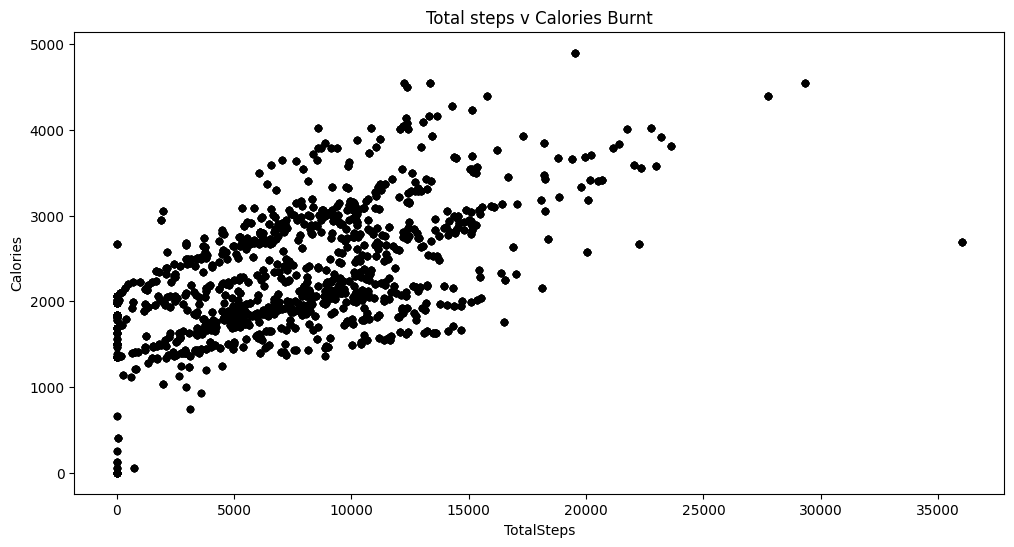

In [64]:
merged_daily.plot.scatter(x='TotalSteps', y='Calories', color='black', alpha=0.5, figsize=(12,6))
plt.title('Total steps v Calories Burnt')
plt.show()

### Discovery

We can see for the visualization there is a positive correlation between the number of steps take and the calories burnt.

Most of the users burn 1000 to 3000 calories and take steps between 0 to 15000 on a daily basis

### Time in Bed and Time Asleep

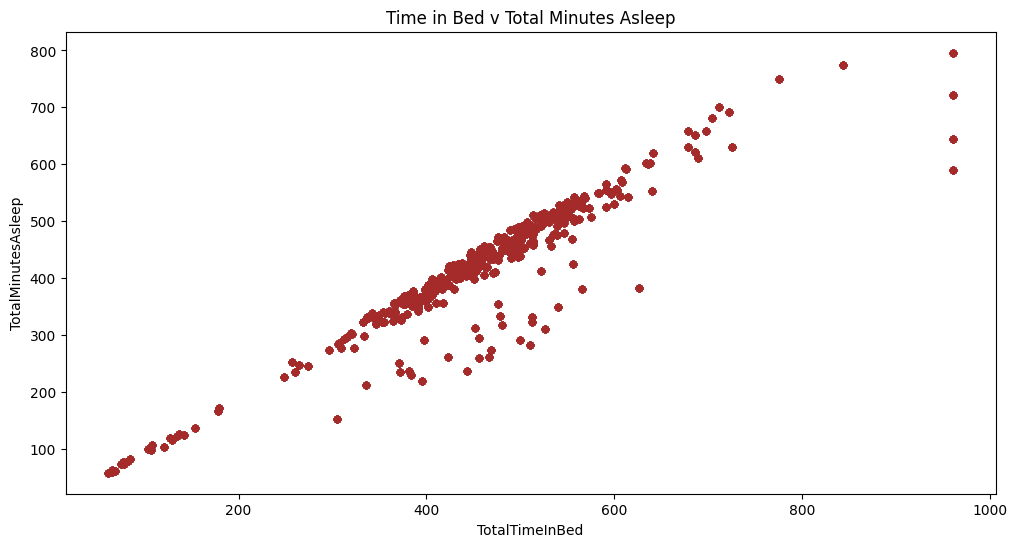

In [65]:
merged_daily.plot.scatter(x='TotalTimeInBed', y='TotalMinutesAsleep', color='brown', alpha=0.5, figsize=(12,6))
plt.title('Time in Bed v Total Minutes Asleep')
plt.show()

### Discovery

Majority of the users fall asleep as they go to bed but there are some users who stay awake for sometime and do not fall asleep quickly.

### Average Calories Burnt by Time of the Day

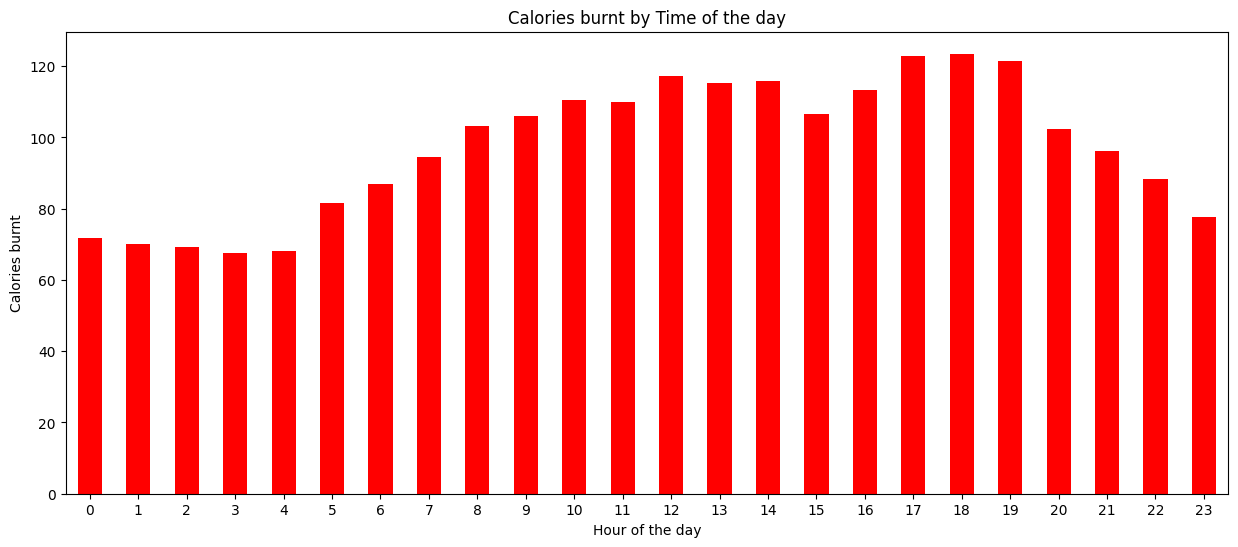

In [66]:
fig, axs = plt.subplots(figsize=(15, 6))
merged_hours.groupby(merged_hours['Time'].dt.hour)['Calories'].mean().plot(kind='bar', rot=0, ax=axs, color='red', title='Calories burnt by Time of the day')
plt.xlabel("Hour of the day")
plt.ylabel("Calories burnt")
plt.show()

### Discovery

Users burn most of their calories between 8 a.m. and 8 p.m. which are the active hours

### Busiest Hours of the Day

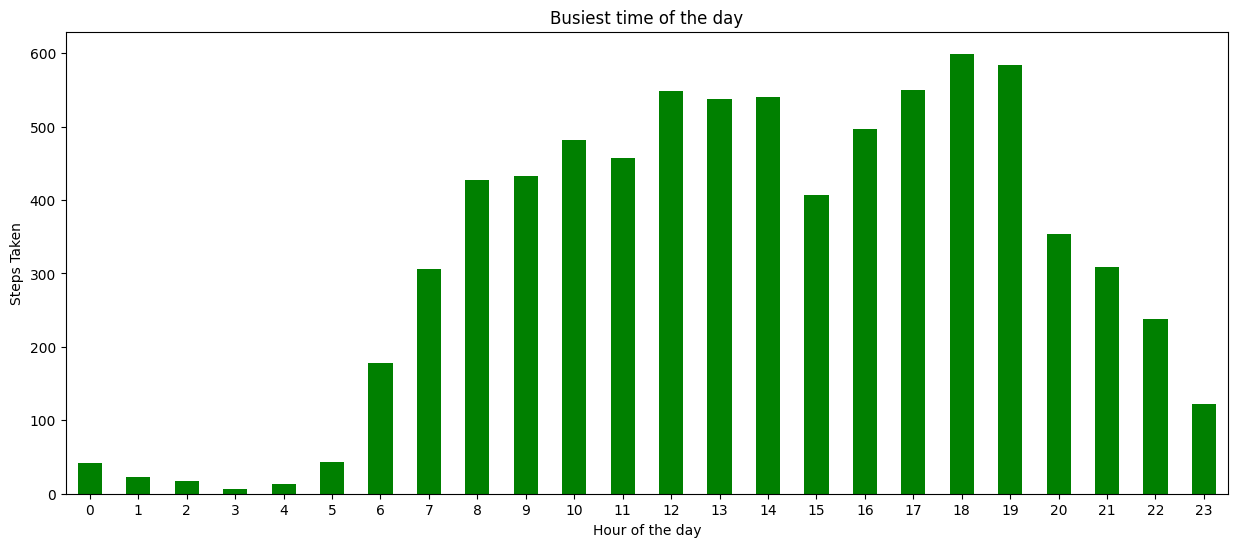

In [67]:
fig, axs = plt.subplots(figsize=(15, 6))
merged_hours.groupby(merged_hours['Time'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='green', title='Busiest time of the day')
plt.xlabel("Hour of the day")
plt.ylabel("Steps Taken")
plt.show()

### Discovery

The active hours start from 6 a.m. and last till 10 p.m.

### Percentage of Activity Minutes

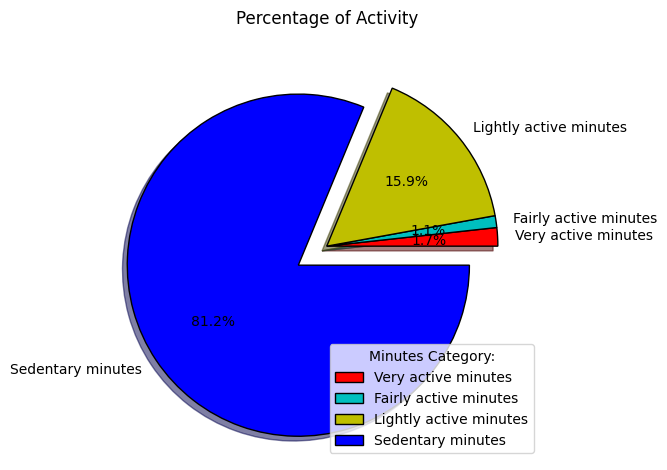

In [68]:
# Calculating sum of these minutes columns
very_active = merged_daily["VeryActiveMinutes"].sum()
fairly_active = merged_daily["FairlyActiveMinutes"].sum()
lightly_active = merged_daily["LightlyActiveMinutes"].sum()
sedentary = merged_daily["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active, fairly_active, lightly_active, sedentary]
my_labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
my_colours = ["r", "c", "y", "blue"]
my_explode = [0, 0, 0, 0.2]
plt.style.use("default")
plt.pie(slices, labels = my_labels,
        colors = my_colours, shadow = True, wedgeprops = {"edgecolor": "black"},
        explode = my_explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity")
plt.legend(loc='lower right', title = "Minutes Category:")
plt.tight_layout()
plt.show()

### Discovery

The sedantry minutes make up to 81% of the day while the active minutes are only 19% of the day.

### Total Steps by Day of the Week

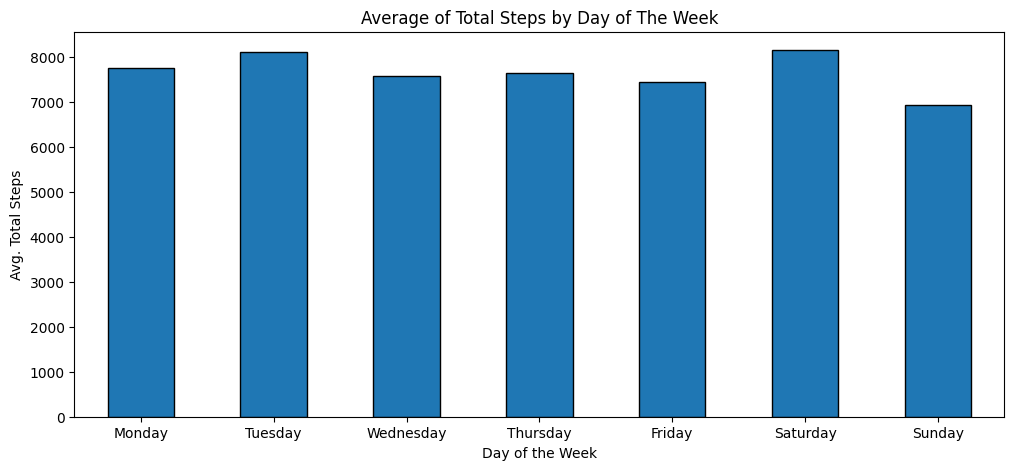

In [69]:
df_weekday['TotalSteps'].plot.bar(xlabel='Day of the Week', ylabel='Avg. Total Steps', title='Average of Total Steps by Day of The Week', edgecolor='black', rot=0, figsize=(12,5))
plt.show()

### Discovery

The busiest days in a week are Monday and Thursday while on Sunday the users are least active

# **Act**

In this final stage of our analysis we will come up with the answers to the business question and will provide recommendations to the stackholders to derive a better marketing strategy.

### Trends in smart devices usage

*   Users are spending 81% of the time inactive
*   There is a positive relationship between the number of the steps taken and the number of calories burnt.
*   The Users burn most of their calories between 8 a.m. and 8 p.m.
*   Tuesday and Thursday are the days when the users are most active and burn most of their calories.
*   Users are taking 7 hours of sleep on average and sleep more on Sundays.

### Recommendations

*   We can provide daily and weekly challenges to the Bellabeat Users so their inactive time can be better utilized and their health can be improved.
*   We can add a timer to the app which can remind the users to take actions to complete the daily challenge which can be hydration, number of steps, etc.
*   Users completing the daily and weekly challenges should be provided with a reward in the form of revenue or discount.
*   There should be a partnership option for the premium members of the app so they can exercise together which can make the activity more exciting and will generate more revenue.



